# Kidney Stone Prediction (Binary Classification Problem)
The dataset "Kidneystone prediction" comprises 414 rows and contains information related to various parameters associated with kidney stones. Here's a brief overview of the columns:

1. **id**: An identification number for each entry in the dataset.
2. **gravity**: Represents the specific gravity of urine, measured as a floating-point number.
3. **ph**: Denotes the pH level of urine, measured as a floating-point value.
4. **osmo**: Indicates the osmolality (concentration of a solution) in the urine, measured as an integer.
5. **cond**: Represents the conductivity of urine, measured as a floating-point value.
6. **urea**: Denotes the level of urea in urine, measured as an integer.
7. **calc**: Represents the level of calcium in urine, measured as a floating-point value.
8. **target**: Indicates the target variable, likely denoting the presence or absence of kidney stones, measured as an integer (possibly binary: 0 for absence, 1 for presence).

This dataset seems to contain various parameters related to urine composition and characteristics, aiming to predict the likelihood or presence of kidney stones based on these features.

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Import Dataset

In [4]:
df= pd.read_csv('/content/drive/MyDrive/PC/Artificial Intelligence/Projects + Assignments/Machine Learning/Kidney Stone Prediction (Binary Classification Problem)/train.csv')
df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


## 3. Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [6]:
df.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [7]:
#Null values
df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [8]:
# check duplicated values
df.duplicated().sum()

0

In [9]:
df.shape

(414, 8)

In [10]:
df.sample(5)

,id,gravity,ph,osmo,cond,urea,calc,target
160,160,1.015,5.87,253,17.7,141,1.45,0
233,233,1.020,7.94,1236,25.3,620,3.46,0
45,45,1.008,5.98,779,17.8,418,6.99,1
111,111,1.017,6.79,760,25.3,199,0.58,1
201,201,1.018,7.61,527,20.8,75,3.98,1


In [11]:
#correlation
cr=df.corr()
cr

,id,gravity,ph,osmo,cond,urea,calc,target
id,1.000000,-0.004775,-0.086619,0.008030,0.032843,-0.023822,0.032360,0.018222
gravity,-0.004775,1.000000,-0.290349,0.692317,0.470433,0.631710,0.494304,0.282577
ph,-0.086619,-0.290349,1.000000,-0.309495,-0.190185,-0.279749,-0.214402,-0.094983
osmo,0.008030,0.692317,-0.309495,1.000000,0.708480,0.809880,0.472114,0.244770
cond,0.032843,0.470433,-0.190185,0.708480,1.000000,0.499109,0.330609,0.172224
urea,-0.023822,0.631710,-0.279749,0.809880,0.499109,1.000000,0.489879,0.265211
calc,0.032360,0.494304,-0.214402,0.472114,0.330609,0.489879,1.000000,0.467439
target,0.018222,0.282577,-0.094983,0.244770,0.172224,0.265211,0.467439,1.000000


<Axes: >

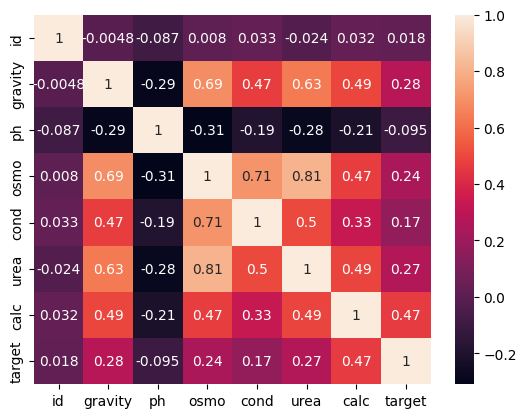

In [12]:
sns.heatmap(df.corr(), annot= True)

<Axes: >

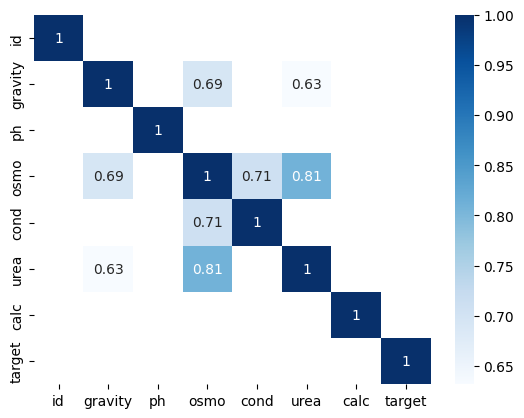

In [13]:
acr= cr[cr>=0.5]
sns.heatmap(acr, annot= True, cmap='Blues' )

high correlation:
1] osmo and urea
2] osmo and cond
3] osmo and gravity
hence osmo is an important feature for prediction

In [14]:
#to check whether the data (train dataset) is balanced or not
df['target'].value_counts()
# so data is imbalanced

target
0    230
1    184
Name: count, dtype: int64

## 3. Exploratory Data Analysis

## 3.1 Univariate Analysis

<Axes: xlabel='target', ylabel='count'>

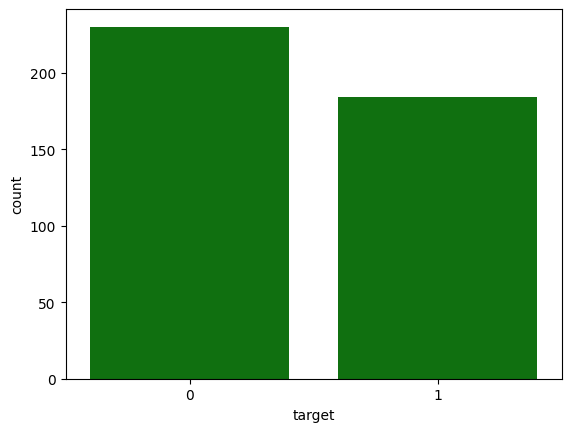

In [16]:
sns.countplot(data= df, x='target',legend='full',color='green',stat='count')

Text(0.5, 1.0, 'value counts of target')

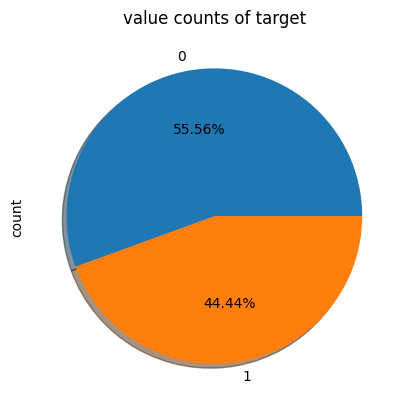

In [17]:
#visualizing with a pie chart
target_counts= df['target'].value_counts()
target_counts.plot(kind= 'pie', autopct= '%1.2f%%', shadow= True)
plt.title('value counts of target')

<Axes: xlabel='osmo', ylabel='Count'>

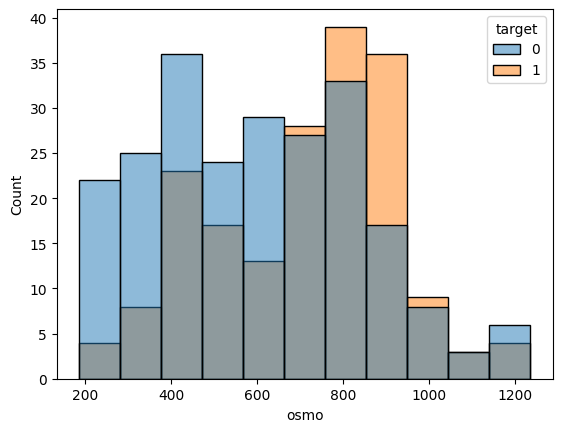

In [18]:
sns.histplot(data= df, x='osmo', hue='target')

In [19]:
df['osmo'].value_counts()

osmo
577    23
874    23
781    12
840    11
364    10
       ..
251     1
873     1
312     1
933     1
749     1
Name: count, Length: 80, dtype: int64

In [20]:
df['osmo'].describe()

count     414.000000
mean      651.545894
std       234.676567
min       187.000000
25%       455.250000
50%       679.500000
75%       840.000000
max      1236.000000
Name: osmo, dtype: float64

In [21]:
x= df.drop(['id', 'target'], axis= 1)

In [22]:
y= df['target']

In [23]:
y.shape

(414,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,  x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 101)

In [26]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((289, 6), (289,), (125, 6), (125,))

**model building**

*Logistic Regression*

In [27]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()


In [28]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred_lr= lr.predict(x_test)

## Model Accuracy

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)

0.712

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
cm= confusion_matrix(y_test, y_pred_lr)
cm

array([[56, 11],
       [25, 33]])

In [33]:
cr= classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.84      0.76        67
           1       0.75      0.57      0.65        58

    accuracy                           0.71       125
   macro avg       0.72      0.70      0.70       125
weighted avg       0.72      0.71      0.71       125



*Decision Trees*

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [35]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred_tree= dt.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_tree)

0.712

In [38]:
cm= confusion_matrix(y_pred_tree, y_test)
cm

array([[49, 18],
       [18, 40]])

In [39]:
cr= classification_report(y_pred_tree, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        67
           1       0.69      0.69      0.69        58

    accuracy                           0.71       125
   macro avg       0.71      0.71      0.71       125
weighted avg       0.71      0.71      0.71       125



*Random Forest*

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators= 20)

In [41]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [42]:
y_pred_rf= rf.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rf)

0.752

In [44]:
cm= confusion_matrix(y_pred_rf, y_test)
cm

array([[54, 18],
       [13, 40]])

In [45]:
cr= classification_report(y_pred_rf, y_test)
print(cr)


              precision    recall  f1-score   support

           0       0.81      0.75      0.78        72
           1       0.69      0.75      0.72        53

    accuracy                           0.75       125
   macro avg       0.75      0.75      0.75       125
weighted avg       0.76      0.75      0.75       125



*KNN*

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [47]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [48]:
y_predict_knn= knn.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_knn)

0.592

In [50]:
cm= confusion_matrix(y_predict_knn, y_test)
cm

array([[47, 31],
       [20, 27]])

In [51]:
cr= classification_report(y_predict_knn, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.60      0.65        78
           1       0.47      0.57      0.51        47

    accuracy                           0.59       125
   macro avg       0.58      0.59      0.58       125
weighted avg       0.61      0.59      0.60       125



In [52]:
import pickle as pk
pk.dump(rf,open('model.pkl','wb'))